<a href="https://www.kaggle.com/code/archismancoder/deberta-lv1-sentimentpolarities-v3-mincomboloss?scriptVersionId=225563392" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset-tachygraphy/Tachygraphy_EmotionMoodtags_Dataset.csv
/kaggle/input/dataset-tachygraphy/Tachygraphy_MicroText-AIO-V3.xlsx
/kaggle/input/dataset-tachygraphy/Tachygraphy_MicroText-AIO-Emotion_Mood_Tags-V3.xlsx
/kaggle/input/dataset-tachygraphy/Tachygraphy_dataset_main.csv
/kaggle/input/dataset-tachygraphy/Tachygraphy_MicroText-AIO-Sentiment_Polarities_3_Label-V3.xlsx
/kaggle/input/dataset-tachygraphy/Tachygraphy_MicroText-AIO-Sentiment_Polarities_2_Label-V3 (Neutral Omitted).xlsx
/kaggle/input/dataset-tachygraphy/Tachygraphy_MicroText-AIO-V2.xlsx


# DATASET & PREPROCESSING

In [2]:
import emoji
from bs4 import BeautifulSoup
import os
import re
import string
import json

'''For emoji cleaning'''

'For emoji cleaning'

In [3]:
# dataset = pd.read_csv('/kaggle/input/dataset-tachygraphy/Tachygraphy_dataset_main.csv')
dataset = pd.read_excel('/kaggle/input/dataset-tachygraphy/Tachygraphy_MicroText-AIO-Sentiment_Polarities_3_Label-V3.xlsx')

In [4]:
df=dataset

In [5]:
print(df.isnull().sum())

Informal Text       2
Expanded Meaning    3
Sentiment           0
dtype: int64


In [6]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", 
                       "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", 
                       "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", 
                       "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am",
                       "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", 
                       "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have",
                       "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not",
                       "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", 
                       "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                       "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", 
                       "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have",
                       "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is",
                       "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would",
                       "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have",
                       "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have",
                       "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", 
                       "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did",
                       "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", 
                       "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", 
                       "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                       "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have",
                       "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have", 'u.s':'america', 'e.g':'for example'}

punct = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

punct_mapping = {"‘": "'", "₹": "e", "´": "'", "°": "", "€": "e", "™": "tm", "√": " sqrt ", "×": "x", "²": "2", "—": "-", "–": "-", "’": "'", "_": "-",
                 "`": "'", '“': '"', '”': '"', '“': '"', "£": "e", '∞': 'infinity', 'θ': 'theta', '÷': '/', 'α': 'alpha', '•': '.', 'à': 'a', '−': '-', 
                 'β': 'beta', '∅': '', '³': '3', 'π': 'pi', '!':' '}

mispell_dict = {'colour': 'color', 'centre': 'center', 'favourite': 'favorite', 'travelling': 'traveling', 'counselling': 'counseling', 'theatre': 'theater',
                'cancelled': 'canceled', 'labour': 'labor', 'organisation': 'organization', 'wwii': 'world war 2', 'citicise': 'criticize', 'youtu ': 'youtube ',
                'Qoura': 'Quora', 'sallary': 'salary', 'Whta': 'What', 'narcisist': 'narcissist', 'howdo': 'how do', 'whatare': 'what are', 'howcan': 'how can',
                'howmuch': 'how much', 'howmany': 'how many', 'whydo': 'why do', 'doI': 'do I', 'theBest': 'the best', 'howdoes': 'how does', 
                'mastrubation': 'masturbation', 'mastrubate': 'masturbate', "mastrubating": 'masturbating', 'pennis': 'penis', 'Etherium': 'Ethereum', 
                'narcissit': 'narcissist', 'bigdata': 'big data', '2k17': '2017', '2k18': '2018', 'qouta': 'quota', 'exboyfriend': 'ex boyfriend', 
                'airhostess': 'air hostess', "whst": 'what', 'watsapp': 'whatsapp', 'demonitisation': 'demonetization', 'demonitization': 'demonetization',
                'demonetisation': 'demonetization'}

def clean_text(text):
    '''Clean emoji, Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
#     text = emoji.demojize(text)
#     text = re.sub(r'\:(.*?)\:','',text)
#     text = str(text).lower()    #Making Text Lowercase
#     text = re.sub('\[.*?\]', '', text)
    #The next 2 lines remove html text
    text = BeautifulSoup(text, 'lxml').get_text()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
#     text = re.sub('\w*\d\w*', '', text)
    # replacing everything with space except (a-z, A-Z, 0-9, "%", ".", "&", ",", "'", "?", "!", ",", "'", ";", "-")
    text = re.sub(r"[^a-zA-Z0-9?.!,¿'%&,';-]+", " ", text)
    return text

def clean_contractions(text, mapping):
    '''Clean contraction using contraction mapping'''    
    specials = ["’", "‘", "´", "`"]
    for s in specials:
        text = text.replace(s, "'")
    for word in mapping.keys():
        if ""+word+"" in text:
            text = text.replace(""+word+"", ""+mapping[word]+"")
    #Remove Punctuations
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # creating a space between a word and the punctuation following it
    # eg: "he is a boy." => "he is a boy ."
    text = re.sub(r"([?.!,¿])", r" \1 ", text)
    text = re.sub(r'[" "]+', " ", text)
    return text

def clean_special_chars(text, punct, mapping):
    '''Cleans special characters present(if any)'''   
    for p in mapping:
        text = text.replace(p, mapping[p])
    
    for p in punct:
        text = text.replace(p, f' {p} ')
    
    specials = {'\u200b': ' ', '…': ' ... ', '\ufeff': '', 'करना': '', 'है': ''}  
    for s in specials:
        text = text.replace(s, specials[s])
    
    return text

def correct_spelling(x, dic):
    '''Corrects common spelling errors'''   
    for word in dic.keys():
        x = x.replace(word, dic[word])
    return x

def remove_space(text):
    '''Removes awkward spaces'''   
    #Removes awkward spaces 
    text = text.strip()
    text = text.split()
    return " ".join(text)

def text_preprocessing_pipeline(text):
    '''Cleaning and parsing the text.'''
#     text = clean_contractions(text, contraction_mapping)
    text = clean_text(text)
#     text = clean_contractions(text, contraction_mapping)
#     text = clean_special_chars(text, punct, punct_mapping)
#     text = correct_spelling(text, mispell_dict)
    text = remove_space(text)
    return text

In [7]:
df['Informal Text'] = df['Informal Text'].astype(str)

In [8]:
df['Sentiment'] = df['Sentiment'].astype(str)

In [9]:
# df.rename(columns={'Text':'text', 'Sentiment':'sentiment_polarity'}, inplace=True)

In [10]:
df.drop(columns=['Expanded Meaning'], inplace=True)

In [11]:
# df.dropna(subset=['text', 'sentiment_polarity'], inplace=True) # Dropping NULL values

In [12]:
df.info()
# df['text'] = df['text'].astype('str')
# df['sentiment_polarity'] = df['sentiment_polarity'].astype('str')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10280 entries, 0 to 10279
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Informal Text  10280 non-null  object
 1   Sentiment      10280 non-null  object
dtypes: object(2)
memory usage: 160.8+ KB


In [13]:
# df['text'] = df['text'].apply(lambda x: text_preprocessing_pipeline(x))
# df['sentiment_polarity'] = df['sentiment_polarity'].apply(lambda x: text_preprocessing_pipeline(x))
# df['sentiment_polarity'] = df['sentiment_polarity'].apply(lambda x: x.lower())

In [14]:
df['Informal Text'] = df['Informal Text'].apply(lambda x: text_preprocessing_pipeline(x))
df['Sentiment'] = df['Sentiment'].apply(lambda x: text_preprocessing_pipeline(x))

<ipython-input-6-93bb6d8e489f>:51: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'lxml').get_text()


In [15]:
df

,Informal Text,Sentiment
0,"omg, JEE prep is killing me rn",negative
1,u up 4 a break b4 UPSC revision?,neutral
2,"ttyl, finishing da CAT mock",neutral
3,"nah, dat GATE paper was brutal af",negative
4,sup? u done w ur IIT assignment?,neutral
...,...,...
10275,"bruh, UP s power cuts, no relief in sight",negative
10276,"wtf, new tax laws hitting hard, prices gonna jump",negative
10277,"yo, Adani s stock falling, more issues surfacing",negative
10278,"bruh, tech IPOs doing well, investors excited",positive


In [16]:
bin_polar = pd.get_dummies(df['Sentiment'], prefix='', prefix_sep='')

In [17]:
bin_polar = bin_polar.astype(int)

In [18]:
bin_polar

,negative,neutral,positive
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
10275,1,0,0
10276,1,0,0
10277,1,0,0
10278,0,0,1


In [19]:
df = pd.concat([df, bin_polar], axis=1)
df.head()

,Informal Text,Sentiment,negative,neutral,positive
0,"omg, JEE prep is killing me rn",negative,1,0,0
1,u up 4 a break b4 UPSC revision?,neutral,0,1,0
2,"ttyl, finishing da CAT mock",neutral,0,1,0
3,"nah, dat GATE paper was brutal af",negative,1,0,0
4,sup? u done w ur IIT assignment?,neutral,0,1,0


In [20]:
# df.drop(columns=['sentiment_polarity'], inplace=True)
df.head()

,Informal Text,Sentiment,negative,neutral,positive
0,"omg, JEE prep is killing me rn",negative,1,0,0
1,u up 4 a break b4 UPSC revision?,neutral,0,1,0
2,"ttyl, finishing da CAT mock",neutral,0,1,0
3,"nah, dat GATE paper was brutal af",negative,1,0,0
4,sup? u done w ur IIT assignment?,neutral,0,1,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10280 entries, 0 to 10279
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Informal Text  10280 non-null  object
 1   Sentiment      10280 non-null  object
 2   negative       10280 non-null  int64 
 3   neutral        10280 non-null  int64 
 4   positive       10280 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 401.7+ KB


In [22]:
sentiment_polarity_label_mapping = {
    0: "negative", 1: "neutral", 2: "positive"
}

In [23]:
sentiment_polarity_label_mapping_rev = {
    'negative': 0, 'neutral': 1, 'positive': 2
}

In [24]:
SENTIMENT_POLARITY_LABELS = [
    "negative", "neutral", "positive"
]

In [25]:
def test_train_split(dataset, test_ratio=0.1):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

In [26]:
train_ds_pd, validation_ds_pd = test_train_split(df)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(validation_ds_pd)))

9301 examples in training, 979 examples in testing.


In [27]:
train_ds_pd = train_ds_pd.reset_index(drop=True)
validation_ds_pd = validation_ds_pd.reset_index(drop=True)

In [28]:
train_ds_pd.head()

,Informal Text,Sentiment,negative,neutral,positive
0,"omg, JEE prep is killing me rn",negative,1,0,0
1,u up 4 a break b4 UPSC revision?,neutral,0,1,0
2,"ttyl, finishing da CAT mock",neutral,0,1,0
3,sup? u done w ur IIT assignment?,neutral,0,1,0
4,"rn, stuck on a prob from NEET guide",negative,1,0,0


In [29]:
sentiment_labels = np.array(train_ds_pd['Sentiment'])
sentiment_labels

array(['negative', 'neutral', 'neutral', ..., 'negative', 'positive',
       'negative'], dtype=object)

In [30]:
train_ds_pd = df

In [31]:
train_ds_pd.drop(columns=['Sentiment'], inplace=True)
validation_ds_pd.drop(columns=['Sentiment'], inplace=True)

In [32]:
train_ds_pd.head()

,Informal Text,negative,neutral,positive
0,"omg, JEE prep is killing me rn",1,0,0
1,u up 4 a break b4 UPSC revision?,0,1,0
2,"ttyl, finishing da CAT mock",0,1,0
3,"nah, dat GATE paper was brutal af",1,0,0
4,sup? u done w ur IIT assignment?,0,1,0


In [33]:
validation_ds_pd.head()

,Informal Text,negative,neutral,positive
0,"nah, dat GATE paper was brutal af",1,0,0
1,"fyi, da UPSC date changed again",0,1,0
2,"gtg, hv to prep 4 da JEE mock tmr",0,1,0
3,dat prof's lectures 4 MBA prep r tough,0,1,0
4,u ready 4 da IES mock tmr?,0,1,0


In [34]:
sentiment_indexed_labels = np.array([sentiment_polarity_label_mapping_rev[label] for label in sentiment_labels])
sentiment_indexed_labels

array([0, 1, 1, ..., 0, 2, 0])

In [35]:
import torch
import torch.nn
import torch.nn as nn

## Calculating Class Weights for each labels to avoid imbalanced distribution

In [36]:
class_counts = np.bincount(sentiment_indexed_labels)
total_samples = len(sentiment_labels)
class_weights = total_samples / (len(class_counts) * class_counts)
class_weights = class_weights / class_weights.sum()
class_weights = torch.tensor(class_weights, dtype=torch.float)
class_weights

tensor([0.2635, 0.3301, 0.4064])

## Class Weight NOTE
### This class weights are for the training dataset and are to be used while training.

### SETTING CUDA

In [37]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [38]:
from transformers import RobertaTokenizer, RobertaModel
from transformers import DebertaV2Model, DebertaV2Tokenizer
from torch.utils.data import Dataset, DataLoader

In [39]:
# tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
tokenizer = DebertaV2Tokenizer.from_pretrained('microsoft/deberta-v3-base')

tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

## TORCH IMPORTS

In [40]:
from torch.optim import AdamW
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from transformers import RobertaTokenizer, RobertaModel
from sklearn.model_selection import train_test_split
import optuna
# from optuna.integration import PyTorchLightningPruner
from ray import tune
import ray
from ray import tune
from ray.tune import CLIReporter
from ray.tune import CLIReporter
from ray.tune.schedulers import ASHAScheduler
from ray.tune.schedulers import ASHAScheduler
# from ray.tune.integration.pytorch import TuneReportCallback
from torch.amp import GradScaler, autocast
# from ray.tune.integration.optuna import OptunaSearch
from ray.tune.search.optuna import OptunaSearch
from ray import tune
from ray.tune.search.hyperopt import HyperOptSearch
from torch import autocast
# from ray import tune
# from ray.tune.integration.tensorboard import TensorBoardReporter
from ray.tune.logger import TBXLogger
from torch.utils.tensorboard import SummaryWriter
from ray.train import report
# from ray.tune.integration.jupyter import JupyterNotebookReporter
from ray.tune import JupyterNotebookReporter
# from torch.cuda.amp import GradScaler, autocast
from torch.optim.lr_scheduler import StepLR, CosineAnnealingLR
from ray.tune.schedulers import HyperBandScheduler, AsyncHyperBandScheduler

# DATASET CONFIG & ENCODING

In [41]:
class SentimentDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len = 2048):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.max_len = max_len

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        text = str(self.data.iloc[index]['Informal Text'])
        labels = self.data.iloc[index][['negative', 'neutral', 'positive']].values.astype(np.float32)
        return {"text": text, "labels": labels}  # Return raw text and labels


In [42]:
# class SentimentDataset(Dataset):
#     def __init__(self, dataframe, tokenizer, max_len = 2048):
#         self.tokenizer = tokenizer
#         self.data = dataframe
#         self.max_len = max_len

#     def __len__(self):
#         return len(self.data)

#     def __getitem__(self, index):
# #         text = self.data.iloc[index, 0]
# #         labels = self.data.iloc[index, 1:].values.astype(float)
#         text = str(self.data.iloc[index]['Informal Text'])
#         labels = self.data.iloc[index][['negative', 'neutral', 'positive']].values.astype(np.float32)

#         inputs = self.tokenizer.encode_plus(
#             text,
#             None,
#             add_special_tokens=True,
#             padding=False,
#             truncation=False,
#             return_token_type_ids=False
#         )

#         input_ids = inputs['input_ids']
#         attention_mask = inputs['attention_mask']

#         return {
#             'input_ids': torch.tensor(input_ids, dtype=torch.long),
#             'attention_mask': torch.tensor(attention_mask, dtype=torch.long),
#             'labels': torch.tensor(labels, dtype=torch.float)
#         }

# MODEL DEFINITION

In [43]:
from transformers import AutoModel, AutoTokenizer, AutoConfig
from safetensors.torch import save_file, load_file
from huggingface_hub import hf_hub_download

In [44]:
class SentimentModel(nn.Module):
    def __init__(self, roberta_model=DebertaV2Model.from_pretrained(
            'microsoft/deberta-v3-base',
            device_map=torch.device("cuda" if torch.cuda.is_available() else "cpu")
        ), n_classes=3, dropout_rate=0.2):
        super(SentimentModel, self).__init__()
        self.roberta = roberta_model
        self.drop = nn.Dropout(p=dropout_rate)
        self.fc1 = nn.Linear(self.roberta.config.hidden_size, 256)  # Reduced neurons
        self.relu = nn.ReLU()
        self.out = nn.Linear(256, n_classes)
        
    def forward(self, input_ids, attention_mask):
        # Get the RoBERTa output
        output = self.roberta(input_ids=input_ids, attention_mask=attention_mask)
        cls_token_state = output.last_hidden_state[:, 0, :]
        # Pass through the custom layers
        output = self.drop(cls_token_state)
        output = self.relu(self.fc1(output))
#         output = self.drop(output)
        return self.out(output)

    def save_pretrained(self, save_directory):
        os.makedirs(save_directory, exist_ok=True)

        # Save model weights using safetensors
        model_weights = self.state_dict()
        save_file(model_weights, os.path.join(save_directory, "model.safetensors"))

        # Save model config
        config = {
            "hidden_size": self.roberta.config.hidden_size,
            "num_labels": self.out.out_features,
            "dropout_rate": self.drop.p,
            "roberta_model": self.roberta.name_or_path
        }
        with open(os.path.join(save_directory, "config.json"), "w") as f:
            json.dump(config, f)

        print(f"Model saved in {save_directory}")

    @classmethod
    def load_pretrained(cls, model_path_or_repo):
        if model_path_or_repo.startswith("http") or "/" not in model_path_or_repo:
            # Load from Hugging Face Hub
            model_config_path = hf_hub_download(model_path_or_repo, "config.json")
            model_weights_path = hf_hub_download(model_path_or_repo, "model.safetensors")
        else:
            # Load from local directory
            model_config_path = os.path.join(model_path_or_repo, "config.json")
            model_weights_path = os.path.join(model_path_or_repo, "model.safetensors")

        # Load model config
        with open(model_config_path, "r") as f:
            config = json.load(f)

        # Load RoBERTa model
        roberta_model = AutoModel.from_pretrained(config["roberta_model"])

        # Initialize SentimentModel
        model = cls(
            roberta_model,
            n_classes=config["num_labels"],
            dropout_rate=config["dropout_rate"]
        )

        # Load safetensors weights
        model_weights = load_file(model_weights_path)
        model.load_state_dict(model_weights)

        print(f"Model loaded from {model_path_or_repo}")
        return model

pytorch_model.bin:   0%|          | 0.00/371M [00:00<?, ?B/s]

## Other Models to try out

In [45]:
# class SentimentModel(nn.Module):
#     def __init__(self, roberta_model, n_classes, dropout_rate):
#         super(SentimentModel, self).__init__()
#         self.roberta = roberta_model
#         self.drop = nn.Dropout(p=dropout_rate)
#         self.fc1 = nn.Linear(self.roberta.config.hidden_size, 512)
#         self.relu = nn.ReLU()
#         self.fc2 = nn.Linear(512, 256)
#         self.out = nn.Linear(256, n_classes)
#         self.softmax = nn.LogSoftmax(dim=1)

#     def forward(self, input_ids, attention_mask):
#         # Get the RoBERTa output
#         output = self.roberta(input_ids=input_ids, attention_mask=attention_mask)
#         cls_token_state = output.last_hidden_state[:, 0, :]
#         # Pass through the custom layers
#         output = self.drop(cls_token_state)
# #         output = cls_token_state
#         output = self.relu(self.fc1(output))
#         output = self.drop(output)
#         output = self.relu(self.fc2(output))
# #         output = self.drop(output)
#         return self.out(output)

In [46]:
# class AdvancedPooling(nn.Module):
#     def __init__(self, hidden_size):
#         super(AdvancedPooling, self).__init__()
#         self.hidden_size = hidden_size

#     def forward(self, hidden_states):
#         cls_output = hidden_states[:, 0, :]  # [CLS] token output
#         mean_output = hidden_states.mean(dim=1)  # Mean pooling over sequence
#         max_output, _ = hidden_states.max(dim=1)  # Max pooling over sequence
#         combined_output = torch.cat([cls_output, mean_output, max_output], dim=1)
#         return combined_output

In [47]:
# class SentimentModel(nn.Module):
#     def __init__(self, roberta_model, n_classes, dropout_rate):
#         super(SentimentModel, self).__init__()
#         self.roberta = roberta_model
#         self.drop = nn.Dropout(p=dropout_rate)
#         self.fc1 = nn.Linear(self.roberta.config.hidden_size * 3, 512)
#         self.attention_pooling = AdvancedPooling(hidden_size=self.roberta.config.hidden_size)
#         self.drop = nn.Dropout(p=dropout_rate)
#         self.relu = nn.ReLU()
#         self.fc2 = nn.Linear(512, 256)
#         self.out = nn.Linear(256, n_classes)
#         self.softmax = nn.LogSoftmax(dim=1)

#     def forward(self, input_ids, attention_mask):
#         output = self.roberta(input_ids=input_ids, attention_mask=attention_mask)
#         cls_output = output.last_hidden_state[:, 0, :]  # Extract [CLS] token representation
#         hidden_states = output.last_hidden_state  # Sequence hidden states
#         pooled_output = self.attention_pooling(hidden_states)  # Attention pooling  # Combine CLS and attention pooling
#         output = self.drop(pooled_output)
#         output = self.relu(self.fc1(output))
#         output = self.drop(output)
#         output = self.relu(self.fc2(output))
#         output = self.drop(output)
#         return self.out(output)

## TRAIN & VALIDATION
### Custom metric is a metric for determining the best model free from any overfitting, underfitting. ```custom_metric = (avg_val_loss−val_accuracy) + α × ∣avg_train_loss−avg_val_loss∣ + β × ∣val_accuracy-train_accuracy∣``` This metric balances between low validation loss, high validation accuracy, and penalizing large discrepancies between training and validation loss. Note that, in the model selection we have used ```α = β = 0.5```


### But, if we have probabilistic values as input and output we cannot directly calculate the accuracy, infact we need to rely on loss only. ```custom_metric = avg_val_loss + α × ∣avg_train_loss−avg_val_loss∣```

In [48]:
# Custom metric calculation function
def calculate_custom_metric(avg_val_loss, avg_train_loss, alpha=0.5):
    loss_diff = abs(avg_train_loss - avg_val_loss)
    custom_metric = avg_val_loss + alpha * loss_diff
    return custom_metric

### Early Stopping

In [49]:
class EarlyStopping:
    def __init__(self, patience=5, verbose=False, delta=0):
        """
        EarlyStopping to stop training when a metric has stopped improving.

        Args:
            patience (int): How long to wait after last time validation loss improved.
            verbose (bool): If True, prints a message for each validation loss improvement.
            delta (float): Minimum change to qualify as an improvement.
        """
        self.patience = patience
        self.verbose = verbose
        self.delta = delta
        self.counter = 0
        self.best_loss = np.inf
        self.early_stop = False

    def __call__(self, val_loss, model):
        if val_loss < self.best_loss - self.delta:
            self.best_loss = val_loss
            self.counter = 0
#             if self.verbose:
#                 print(f'Validation loss improved to {val_loss:.4f}')
#             torch.save(model.state_dict(), 'checkpoint.pt')
        else:
            self.counter += 1
#             if self.verbose:
#                 print(f'Validation loss did not improve. Patience: {self.patience}, Counter: {self.counter}')
        
        if self.counter >= self.patience:
            self.early_stop = True

In [50]:
def collate_fn(batch):
    texts = [item['text'] for item in batch]
    labels = torch.tensor([item['labels'] for item in batch], dtype=torch.float)
    # labels = torch.stack([item['labels'] for item in batch])

    # Tokenize and pad using the tokenizer
    padded = tokenizer(
        texts,
        None,
        add_special_tokens=True,
        padding="longest",
        truncation=False,
        return_tensors="pt",
        return_token_type_ids=False,
    )

    return {
        'input_ids': padded['input_ids'],
        'attention_mask': padded['attention_mask'],
        'labels': labels  # No dtype here
    }

In [51]:
# def collate_fn(batch):
#     input_ids = [item['input_ids'] for item in batch]
#     attention_masks = [item['attention_mask'] for item in batch]
#     labels = torch.stack([item['labels'] for item in batch])  # Stack labels

#     # Dynamically pad sequences per batch
#     padded = tokenizer.pad(
#         {"input_ids": input_ids, "attention_mask": attention_masks},
#         padding="longest",
#         return_tensors="pt"
#     )

#     return {
#         'input_ids': padded['input_ids'],
#         'attention_mask': padded['attention_mask'],
#         'labels': labels
#     }

In [52]:
# # Define the training function with variable parameters
# def train_model(config, train_dataset, val_dataset, device):
# #     model = SentimentModel(
# #         roberta_model=RobertaModel.from_pretrained("roberta-base"),
# #         n_classes=3,
# #         dropout_rate=config["dropout_rate"]
# #     )
    
#     model = SentimentModel(
#         roberta_model=DebertaV2Model.from_pretrained('microsoft/deberta-v3-base'),
#         n_classes=3,
#         dropout_rate=config["dropout_rate"]
#     )
#     model = model.to(device)
# #     optimizer = optim.Adam(model.parameters(), lr=config["lr"])
#     optimizer = optim.AdamW(model.parameters(), lr=config["lr"], weight_decay=config["weight_decay"])
#     criterion = nn.BCEWithLogitsLoss()
# #     class_weights_tmp = torch.tensor(class_weights, dtype=torch.float32).to(device)
# #     criterion = nn.CrossEntropyLoss(weight=class_weights_tmp)
# #     criterion = nn.BCELoss()
#     scaler = GradScaler()  # Initialize GradScaler
    
#     train_loader = DataLoader(train_dataset, batch_size=config["batch_size"], shuffle=True, collate_fn=collate_fn)
#     val_loader = DataLoader(val_dataset, batch_size=config["batch_size"], shuffle=False, collate_fn=collate_fn)
    
#     scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, verbose=True)
    
#     early_stopping = EarlyStopping(patience=3, verbose=True)
    
#     for epoch in range(config["epochs"]):  # Ensure epochs are passed from config
#         model.train()
#         total_train_loss = 0.0
#         correct_train_preds = 0
#         total_train_preds = 0
        
#         for batch in train_loader:
#             input_ids = batch["input_ids"].to(device)
#             attention_mask = batch["attention_mask"].to(device)
#             labels = batch["labels"].to(device)

#             optimizer.zero_grad()
# #             outputs = model(input_ids=input_ids, attention_mask=attention_mask)
# #             loss = criterion(outputs, labels)
# #             loss.backward()
# #             optimizer.step()

#             with autocast(device_type=device.type):  # Mixed precision
#                 outputs = model(input_ids=input_ids, attention_mask=attention_mask)
#                 loss = criterion(outputs, labels)

#             probabilities = torch.sigmoid(outputs)
#             predictions = torch.zeros_like(probabilities)
#             max_indices = torch.argmax(probabilities, dim=1)
#             predictions.scatter_(1, max_indices.unsqueeze(1), 1)
#             predictions = predictions.float()
                
# #                 loss = criterion(predictions, labels)
            
#             scaler.scale(loss).backward()
#             scaler.step(optimizer)
#             scaler.update()
            
# #             outputs = torch.sigmoid(outputs)  
            
# # NOTE: Apply the sigmoid fn to outputs after BCEWithLogitsLoss because the loss fn already comes with sigmoid applied, so passing the sigmoid applied ouput will give erraneous results.
# # If we use BCELoss then pass the sigmoid applied output.
            
#             total_train_loss += loss.item()
# #             correct_train_preds += (torch.argmax(outputs, dim=1) == torch.argmax(labels, dim=1)).sum().item()
# # #             correct_train_preds += (torch.argmax(outputs, dim=1) == labels).sum().item()
# #             total_train_preds += labels.size(0)

# #             predicted_labels = (outputs > 0.5).float()
# #             correct_train_preds += (predicted_labels == labels).sum().item()
# #             total_train_preds += labels.numel()

# #             correct_train_preds += ((outputs > 0.5) == (labels > 0.5)).sum().item()
# #             total_train_preds += labels.numel()

# #             correct_train_preds += (torch.argmax(outputs, dim=1) == labels).sum().item()
# #             total_train_preds += labels.size(0)

#             correct_train_preds += (predictions == labels).sum().item()
#             total_train_preds += labels.numel()
        
#         avg_train_loss = total_train_loss / len(train_loader)
#         train_accuracy = correct_train_preds / total_train_preds

#         # Validation phase
#         model.eval()
#         total_val_loss = 0.0
#         correct_val_preds = 0
#         total_val_preds = 0

#         with torch.no_grad():
#             for batch in val_loader:
#                 input_ids = batch["input_ids"].to(device)
#                 attention_mask = batch["attention_mask"].to(device)
#                 labels = batch["labels"].to(device)

# #                 outputs = model(input_ids=input_ids, attention_mask=attention_mask)
# #                 loss = criterion(outputs, labels)
                
#                 with autocast(device_type=device.type):
#                     outputs = model(input_ids=input_ids, attention_mask=attention_mask)
#                     loss = criterion(outputs, labels)

#                 probabilities = torch.sigmoid(outputs)
#                 predictions = torch.zeros_like(probabilities)
#                 max_indices = torch.argmax(probabilities, dim=1)
#                 predictions.scatter_(1, max_indices.unsqueeze(1), 1)
#                 predictions = predictions.float()
                
# #                     loss = criterion(predictions, labels)
                    
# #                 outputs = torch.sigmoid(outputs)
                
# # NOTE: Apply the sigmoid fn to outputs after BCEWithLogitsLoss because the loss fn already comes with sigmoid applied, so passing the sigmoid applied ouput will give erraneous results.
# # If we use BCELoss then pass the sigmoid applied output.
                
#                 total_val_loss += loss.item()
# #                 correct_val_preds += (torch.argmax(outputs, dim=1) == torch.argmax(labels, dim=1)).sum().item()
# # #                 correct_val_preds += (torch.argmax(outputs, dim=1) == labels).sum().item()
# #                 total_val_preds += labels.size(0)
    
# #                 predicted_labels = (outputs > 0.5).float()
# #                 correct_val_preds += (predicted_labels == labels).sum().item()
# #                 total_val_preds += labels.numel()
                
# #                 correct_val_preds += ((outputs > 0.5) == (labels > 0.5)).sum().item()
# #                 total_val_preds += labels.numel()

# #                 correct_val_preds += (torch.argmax(outputs, dim=1) == labels).sum().item()
# #                 total_val_preds += labels.size(0)

#                 correct_val_preds += (predictions == labels).sum().item()
#                 total_val_preds += labels.numel()

#         avg_val_loss = total_val_loss / len(val_loader)
#         val_accuracy = correct_val_preds / total_val_preds
# #         custom_metric = avg_val_loss - val_accuracy
#         custom_metric = calculate_custom_metric(avg_val_loss, val_accuracy, avg_train_loss, train_accuracy)

#         # Report metrics using ray.train.report
#         report({
#             "loss": avg_val_loss,
#             "accuracy": val_accuracy,
#             "train_loss": avg_train_loss,
#             "train_accuracy": train_accuracy,
#             "custom_metric": custom_metric,
#             "early_stopping_epoch": epoch + 1,
#         })
        
#         # Learning rate scheduler step
#         scheduler.step(avg_val_loss)
        
#         # Check for early stopping
#         early_stopping(avg_val_loss, model)
#         if early_stopping.early_stop:
# #             print("Early stopping")
#             break
    

#         # Save the model checkpoint after each epoch
# #         trial_dir = os.path.join(os.environ["TUNE_TRIAL_DIR"], "checkpoint.pt")
# #         torch.save(model.state_dict(), 'checkpoint.pt')
# #         checkpoint_path = f"/kaggle/working/checkpoint_epoch_{epoch}.pt"
# #         torch.save(model.state_dict(), checkpoint_path)
    
#     return model

# def train_fn(config):
#     # Load your data here
# #     tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
#     tokenizer = DebertaV2Tokenizer.from_pretrained('microsoft/deberta-v3-base')

#     train_dataset = SentimentDataset(train_ds_pd, tokenizer, max_len=128)
#     val_dataset = SentimentDataset(validation_ds_pd, tokenizer, max_len=128)

#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#     train_model(config, train_dataset, val_dataset, device)

## SEARCH SPACE

In [53]:
# search_space = {
#     'dropout_rate': tune.choice([0.2, 0.25, 0.27, 0.3]),
#     'batch_size': 1,
#     'weight_decay': tune.choice([1e-6, 2e-6, 1e-5, 2e-5, 5e-5, 5e-6]),
#     'lr': tune.choice([1e-6, 1e-5, 2e-5, 2e-6, 5e-6, 5e-5]),
#     'epochs': tune.choice([5, 10, 15])
# }

In [54]:
# search_space = {
#     'dropout_rate': tune.uniform(0.1, 0.5),
#     'batch_size': tune.choice([16, 32, 64]),
#     'weight_decay': tune.loguniform(1e-6, 1e-1),
#     'lr': tune.loguniform(1e-6, 1e-1),
#     'epochs': tune.choice([5, 7, 10, 12, 15, 20])
# }

## SEARCH ALGO

In [55]:
# optuna_search = OptunaSearch(
#     metric="custom_metric",
#     mode="min"
# )

## SCHEDULER ALGO

In [56]:
# scheduler = ASHAScheduler(
#     metric='custom_metric',
#     mode='min',
#     max_t=22,
#     grace_period=3,
#     reduction_factor=2
# )

## REPORTER

In [57]:
# # To ignore warinings
# import warnings
# warnings.filterwarnings('ignore')

In [58]:
# # %load_ext tensorboard
# # %tensorboard --logdir /kaggle/working/tensorboard_logs


# # ray.init(ignore_reinit_error=True)
# # reporter = CLIReporter(
# #     metric_columns=["loss", "accuracy", "custom_metric", "training_iteration", "train_loss", "train_accuracy", "early_stopping_epoch"],
# #     print_intermediate_tables=False
# # )

# reporter = JupyterNotebookReporter(
#     metric_columns=["loss", "accuracy", "custom_metric", "training_iteration", "train_loss", "train_accuracy", "early_stopping_epoch"],
#     print_intermediate_tables=False
# )

# # tuner = tune.run(
# #     train_fn,
# #     config=search_space,
# #     num_samples=25,
# #     progress_reporter=reporter,
# #     resources_per_trial={"cpu": 4, "gpu": 2},  # Adjust resources as needed
# #     scheduler=ASHAScheduler(
# #         metric="accuracy",
# #         mode="max",
# #         max_t=15,
# #         grace_period=1,
# #         reduction_factor=2
# #     )
# # )

# # reporter = TensorBoardReporter(
# #     metric_columns=["loss", "accuracy", "training_iteration", "train_loss", "train_accuracy"]
# # )


# result = tune.run(
#     train_fn,
#     resources_per_trial={"cpu": 2, "gpu": 1},
#     config=search_space,
#     num_samples=15,
#     scheduler=scheduler,
#     progress_reporter=reporter,
#     search_alg=optuna_search
# )

## REPORTER RESULTS

In [59]:
# # best_trial = result.get_best_trial("loss", "min", "last")
# best_trial = result.get_best_trial("custom_metric", "min", "last")
# # best_checkpoint_dir = best_trial.checkpoint.value
# print(f"Best trial config: {best_trial.config}")
# print(f"Best trial final validation loss: {best_trial.last_result['loss']}")
# print(f"Best trial final validation accuracy: {best_trial.last_result['accuracy']}")
# print(f"Best trial final training loss: {best_trial.last_result['train_loss']}")
# print(f"Best trial final training accuracy: {best_trial.last_result['train_accuracy']}")
# print(f"Best trial final custom_metric: {best_trial.last_result['custom_metric']}")
# print(f"Best trial final Early Stopping Epoch: {best_trial.last_result['early_stopping_epoch']}")

## Function to Train the Model with the Best Configuration

##### LOG WRITER

In [60]:
from torch.utils.tensorboard import SummaryWriter
# **TensorBoard Logging**
log_dir = "/kaggle/working/logs"
writer = SummaryWriter(log_dir=log_dir)

#### TRAIN BEST MODEL

In [61]:
def train_best_model(config, device, train_dataset = train_ds_pd, val_dataset = validation_ds_pd):
    print(f"""
    Tuning Model with:
    {config}
    """)
#     model = SentimentModel(
#         roberta_model=RobertaModel.from_pretrained("roberta-base"),
#         n_classes=3,
#         dropout_rate=config["dropout_rate"]
#     )
    model = SentimentModel(
        roberta_model=DebertaV2Model.from_pretrained(
            'microsoft/deberta-v3-base',
            device_map=torch.device("cuda" if torch.cuda.is_available() else "cpu")
        ),
        n_classes=3,
        dropout_rate=config["dropout_rate"]
    )
    model = model.to(device)
    optimizer = optim.AdamW(model.parameters(), lr=config["lr"], weight_decay=config["weight_decay"])
    criterion = nn.BCEWithLogitsLoss()
#     class_weights_tmp = torch.tensor(class_weights, dtype=torch.float32).to(device)
#     criterion = nn.CrossEntropyLoss(weight=class_weights_tmp)
#     criterion = nn.BCELoss()
    scaler = GradScaler()
    
    ## DATASET ENCODING
    
    train_dataset = SentimentDataset(train_ds_pd, tokenizer, max_len=128)
    val_dataset = SentimentDataset(validation_ds_pd, tokenizer, max_len=128)

    train_loader = DataLoader(train_dataset, batch_size=config["batch_size"], shuffle=True, collate_fn=collate_fn)
    val_loader = DataLoader(val_dataset, batch_size=config["batch_size"], shuffle=False, collate_fn=collate_fn)
    
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, verbose=True)
    
    early_stopping = EarlyStopping(patience=5, verbose=True)

    best_val_loss = float("inf")
    best_model_path = None
    
    # Early stopping parameters
    patience = 5
    best_val_loss = float('inf')
    epochs_since_improvement = 0

    global_step = 0  # Track total batch count
    current_lr = config["lr"]

    
    ### Running for config epochs +patience+1 for introducing noise. 
    
    for epoch in range((config["epochs"]+patience+1)):
        model.train()
        total_train_loss = 0.0
        correct_train_preds = 0
        total_train_preds = 0
        
        for batch_idx, batch in enumerate(train_loader):
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            optimizer.zero_grad()
#             outputs = model(input_ids=input_ids, attention_mask=attention_mask)
#             loss = criterion(outputs, labels)
#             loss.backward()
#             optimizer.step()

            with autocast(device_type=device.type):
                outputs = model(input_ids=input_ids, attention_mask=attention_mask)
                loss = criterion(outputs, labels)

            probabilities = torch.sigmoid(outputs)
            predictions = torch.zeros_like(probabilities)
            max_indices = torch.argmax(probabilities, dim=1)
            predictions.scatter_(1, max_indices.unsqueeze(1), 1)
            predictions = predictions.float()
                
#                 loss = criterion(predictions, labels)
            
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
            
#             outputs = torch.sigmoid(outputs)
            
# NOTE: Apply the sigmoid fn to outputs after BCEWithLogitsLoss because the loss fn already comes with sigmoid applied, so passing the sigmoid applied ouput will give erraneous results.
# If we use BCELoss then pass the sigmoid applied output.
            
            total_train_loss += loss.item()
#             correct_train_preds += (torch.argmax(outputs, dim=1) == torch.argmax(labels, dim=1)).sum().item()
# #             correct_train_preds += (torch.argmax(outputs, dim=1) == labels).sum().item()
#             total_train_preds += labels.size(0)

#             predicted_labels = (outputs > 0.5).float()
#             correct_train_preds += (predicted_labels == labels).sum().item()
#             total_train_preds += labels.numel()

#             correct_train_preds += ((outputs > 0.5) == (labels > 0.5)).sum().item()
#             total_train_preds += labels.numel()

#             correct_train_preds += (torch.argmax(outputs, dim=1) == labels).sum().item()
#             total_train_preds += labels.size(0)

            correct_train_preds += (predictions == labels).sum().item()
            total_train_preds += labels.numel()

            avg_train_loss = total_train_loss / len(train_loader)
            train_accuracy = correct_train_preds / total_train_preds


            # **Log per batch**
            avg_train_loss = total_train_loss / len(train_loader)
            train_accuracy = correct_train_preds / total_train_preds
            current_lr = optimizer.param_groups[0]['lr']
            writer.add_scalar("Avg Train Loss/Batch", avg_train_loss, batch_idx)
            writer.add_scalar("Learning Rate/Batch", current_lr, batch_idx)
            writer.add_scalar("Avg Train Accuracy/Batch", train_accuracy, batch_idx)
            writer.add_scalar("Weight Decay/Batch", config["weight_decay"], batch_idx)
        
        avg_train_loss = total_train_loss / len(train_loader)
        train_accuracy = correct_train_preds / total_train_preds

        # Validation phase
        model.eval()
        total_val_loss = 0.0
        correct_val_preds = 0
        total_val_preds = 0

        with torch.no_grad():
            for batch_idx, batch in enumerate(val_loader):
                input_ids = batch["input_ids"].to(device)
                attention_mask = batch["attention_mask"].to(device)
                labels = batch["labels"].to(device)

#                 outputs = model(input_ids=input_ids, attention_mask=attention_mask)
#                 loss = criterion(outputs, labels)

                with autocast(device_type=device.type):
                    outputs = model(input_ids=input_ids, attention_mask=attention_mask)
                    loss = criterion(outputs, labels)

                probabilities = torch.sigmoid(outputs)
                predictions = torch.zeros_like(probabilities)
                max_indices = torch.argmax(probabilities, dim=1)
                predictions.scatter_(1, max_indices.unsqueeze(1), 1)
                predictions = predictions.float()

#                     loss = criterion(predictions, labels)
                
#                 outputs = torch.sigmoid(outputs)
                
# NOTE: Apply the sigmoid fn to outputs after BCEWithLogitsLoss because the loss fn already comes with sigmoid applied, so passing the sigmoid applied ouput will give erraneous results.
# If we use BCELoss then pass the sigmoid applied output.
                
                total_val_loss += loss.item()
#                 correct_val_preds += (torch.argmax(outputs, dim=1) == torch.argmax(labels, dim=1)).sum().item()
# #                 correct_val_preds += (torch.argmax(outputs, dim=1) == labels).sum().item()
#                 total_val_preds += labels.size(0)
    
#                 predicted_labels = (outputs > 0.5).float()
#                 correct_val_preds += (predicted_labels == labels).sum().item()
#                 total_val_preds += labels.numel()

#                 correct_val_preds += ((outputs > 0.5) == (labels > 0.5)).sum().item()
#                 total_val_preds += labels.numel()

#                 correct_val_preds += (torch.argmax(outputs, dim=1) == labels).sum().item()
#                 total_val_preds += labels.size(0)

                correct_val_preds += (predictions == labels).sum().item()
                total_val_preds += labels.numel()

                avg_val_loss = total_val_loss / len(val_loader)
                val_accuracy = correct_val_preds / total_val_preds

                current_lr = optimizer.param_groups[0]['lr']
                writer.add_scalar("Avg Vav Loss/Batch", avg_val_loss, batch_idx)
                writer.add_scalar("Avg Train Loss/Batch", avg_train_loss, batch_idx)
                writer.add_scalar("Learning Rate/Batch", current_lr, batch_idx)
                writer.add_scalar("Avg Train Accuracy/Batch", train_accuracy, batch_idx)
                writer.add_scalar("Avg Val Accuracy/Batch", val_accuracy, batch_idx)
                writer.add_scalar("Weight Decay/Batch", config["weight_decay"], batch_idx)

        avg_val_loss = total_val_loss / len(val_loader)
        val_accuracy = correct_val_preds / total_val_preds

        # Save the model checkpoint after each epoch
        checkpoint_path = f"/kaggle/working/best_checkpoint.pt"
#         torch.save(model.state_dict(), checkpoint_path)

#         # Save the best model based on validation loss
#         if avg_val_loss < best_val_loss:
#             best_val_loss = avg_val_loss
#             best_model_path = checkpoint_path

        # Learning rate scheduler step
        scheduler.step(avg_val_loss)

        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            epochs_since_improvement = 0
            best_model_path = checkpoint_path
            # Save the model checkpoint with the best validation loss
#             checkpoint_path = f"/kaggle/working/best_checkpoint.pt"
#             torch.save(model.state_dict(), checkpoint_path)
            torch.save({
                'model_state_dict': model.state_dict(),
                'config': config  # Save configuration
            }, checkpoint_path)
    
        else:
            epochs_since_improvement += 1

        early_stopping(avg_val_loss, model)
        if early_stopping.early_stop:
            print(f"Early stopping at epoch {epoch + 1}")
            print(f"Best Model Epoch Saved: {epoch - patience +1}")
#             print("Early stopping")
            break
        
#         if epochs_since_improvement >= patience:
#             print(f"Early stopping at epoch {epoch + 1}")
#             print(f"Best Model Epoch Saved: {epoch - patience}")
#             break
            
        custom_metric = calculate_custom_metric(avg_val_loss, avg_train_loss)        
        # custom_metric = calculate_custom_metric(avg_val_loss, val_accuracy, avg_train_loss, train_accuracy)


        # **Log per epoch**
        writer.add_scalar("Loss Train/Epoch", avg_train_loss, epoch)
        writer.add_scalar("Loss Validation/Epoch", avg_val_loss, epoch)
        writer.add_scalar("Accuracy Train/Epoch", train_accuracy, epoch)
        writer.add_scalar("Accuracy Validation/Epoch", val_accuracy, epoch)
        writer.add_scalar("Learning Rate/Epoch", current_lr, epoch)
        writer.add_scalar("Combined Custom Metric (Loss) /Epoch", custom_metric, epoch)
        
        print(f"""
        Validation Loss: {avg_val_loss},
        Training Loss: {avg_train_loss},
        Argmax Binary Validation Accuracy: {val_accuracy},
        Argmax Binary Training Accuracy: {train_accuracy},
        Custom Metric: {custom_metric},
        Epochs: {epoch+1}
        """)
    
    print(f"Best Validation Loss: {best_val_loss}, Best Validation accuracy: {val_accuracy}")

    writer.close()
    
    return model, best_model_path

# BEST MODEL AFTER FINAL TRAINING & VALIDATION

In [62]:
# best_config = best_trial.config

default_config = {'dropout_rate': 0.2, 'batch_size': 8, 'weight_decay': 2e-06, 'lr': 5e-05, 'epochs': 15}

# best_config = best_trial.config

try:
    best_trial = analysis.get_best_trial("loss", "min", "last")
except NameError:
    best_trial = None  # Ensure best_trial is always defined

# Check if best_trial exists and has a valid config, otherwise use default
if best_trial and hasattr(best_trial, "config") and best_trial.config:
    best_config = best_trial.config
else:
    best_config = default_config
    

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Train the model with the best configuration
best_model, best_model_path = train_best_model(best_config, device, train_ds_pd, validation_ds_pd)



    Tuning Model with:
    {'dropout_rate': 0.2, 'batch_size': 8, 'weight_decay': 2e-06, 'lr': 5e-05, 'epochs': 15}
    


<ipython-input-50-3fa721dbf73a>:3: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  labels = torch.tensor([item['labels'] for item in batch], dtype=torch.float)



        Validation Loss: 0.2379071913144695,
        Training Loss: 0.39104170971024593,
        Argmax Binary Validation Accuracy: 0.9005788219271366,
        Argmax Binary Training Accuracy: 0.8231517509727626,
        Custom Metric: 0.31447445051235773,
        Epochs: 1
        

        Validation Loss: 0.15654784775286065,
        Training Loss: 0.24955535479440763,
        Argmax Binary Validation Accuracy: 0.940755873340143,
        Argmax Binary Training Accuracy: 0.8979896238651103,
        Custom Metric: 0.20305160127363414,
        Epochs: 2
        

        Validation Loss: 0.1088729402915446,
        Training Loss: 0.18221589225137802,
        Argmax Binary Validation Accuracy: 0.9713993871297242,
        Argmax Binary Training Accuracy: 0.9287289234760052,
        Custom Metric: 0.1455444162714613,
        Epochs: 3
        

        Validation Loss: 0.06075054497128671,
        Training Loss: 0.134578716293963,
        Argmax Binary Validation Accuracy: 0.982294858699

# Save the best model


In [63]:
# Save the best model
#### Comment when wanting to select the model which is stopped early to avoid over or under fitting

# final_model_path = "/kaggle/working/final_best_model.pt"
# torch.save(best_model.state_dict(), final_model_path) 

#### Comment when wanting to select the model which is stopped early to avoid over or under fitting

final_model_path = "/kaggle/working/final_best_model.pt"
# torch.save(best_model.state_dict(), final_model_path)
torch.save({'model_state_dict': best_model.state_dict(),'config': best_config}, final_model_path)

print(f"Best model saved at: {final_model_path}")

Best model saved at: /kaggle/working/final_best_model.pt


In [64]:
best_model.save_pretrained("/kaggle/working/HF_MODEL_SAFETENSORS/")
tokenizer.save_pretrained("/kaggle/working/HF_MODEL_SAFETENSORS/")
print("Model saved successfully!")

Model saved in /kaggle/working/HF_MODEL_SAFETENSORS/
Model saved successfully!


# Load the best model

In [65]:
# Load the best model
final_model_path = "/kaggle/working/final_best_model.pt"
# final_model_path = "/kaggle/input/tachygraphy-lv2-emotion-moodtags-v1/transformers/default/1/final_best_model.pt"


checkpoint = torch.load(final_model_path)
config = checkpoint['config']

# loaded_model = SentimentModel(
#     roberta_model=RobertaModel.from_pretrained("roberta-base"),
#     n_classes=3,
#     dropout_rate=config["dropout_rate"]
# )
loaded_model = SentimentModel(
    roberta_model=DebertaV2Model.from_pretrained('microsoft/deberta-v3-base'),
    n_classes=3,
    dropout_rate=config["dropout_rate"]
)
loaded_model.load_state_dict(checkpoint['model_state_dict'])
loaded_model = loaded_model.to(device)
loaded_model.eval()

print(f"Loaded model from {final_model_path} for inference.")


<ipython-input-65-af7318b9858a>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(final_model_path)


Loaded model from /kaggle/working/final_best_model.pt for inference.


# PREDICT ON RANDOM INPUT

## Prediction Function

In [66]:
def predict(text, model, tokenizer, device, max_len=128):
    # model.eval()  # Set model to evaluation mode

    # Tokenize and pad the input text
    inputs = tokenizer(
        text,
        None,
        add_special_tokens=True,
        padding=True,
        truncation=False,
        return_tensors="pt",
        return_token_type_ids=False,
    ).to(device)  # Move input tensors to the correct device

    with torch.no_grad():
        outputs = model(input_ids=inputs["input_ids"], attention_mask=inputs["attention_mask"])

    # Apply sigmoid activation (for BCEWithLogitsLoss)
    probabilities = torch.sigmoid(outputs).cpu().numpy()

    return probabilities


In [67]:
# def predict(text, model, tokenizer, device, max_len=128):

#     inputs = tokenizer.encode_plus(
#         text,
#         None,
#         add_special_tokens=True,
#         padding=False,
#         truncation=False,
#         return_token_type_ids=False,
#         return_tensors='pt'
#     )

#     padded = tokenizer.pad(
#         {"input_ids": inputs["input_ids"], "attention_mask": inputs["attention_mask"]},
#         padding="longest",
#         return_tensors="pt"
#     )


#     input_ids = padded['input_ids'].to(device)
#     attention_mask = padded['attention_mask'].to(device)

    
#     with torch.no_grad():
#         outputs = model(input_ids=input_ids, attention_mask=attention_mask)
    
#     return torch.sigmoid(outputs).cpu().numpy()

In [68]:
# def predict(text, model, tokenizer, device, max_len=128):
#     # inputs = tokenizer.encode_plus(
#     #     text,
#     #     None,
#     #     add_special_tokens=True,
#     #     max_length=max_len,
#     #     padding='max_length',
#     #     truncation=True,
#     #     return_token_type_ids=False,
#     #     return_tensors='pt'
#     # )

#     inputs = tokenizer.encode_plus(
#         text,
#         None,
#         add_special_tokens=True,
#         padding=False,
#         truncation=False,
#         return_token_type_ids=False,
#         return_tensors='pt'
#     )

#     padded = tokenizer.pad(
#         {"input_ids": inputs["input_ids"], "attention_mask": inputs["attention_mask"]},
#         padding=True,
#         return_tensors="pt"
#     )
    
#     # input_ids = inputs['input_ids']
#     # attention_mask = inputs['attention_mask']

#     input_ids = padded['input_ids'].to(device)
#     attention_mask = padded['attention_mask'].to(device)
    
#     input_ids = input_ids.to(device)
#     attention_mask = attention_mask.to(device)
    
#     with torch.no_grad():
#         outputs = model(input_ids=input_ids, attention_mask=attention_mask)
    
#     return torch.sigmoid(outputs).cpu().numpy()

# #     # Convert logits to probabilities using sigmoid
# #     probabilities = torch.sigmoid(logits)
    
# #     # Convert probabilities to binary predictions
# #     predictions = torch.zeros_like(probabilities)
# #     max_indices = torch.argmax(probabilities, dim=1)
# #     predictions.scatter_(1, max_indices.unsqueeze(1), 1)
    
# #     # Move predictions to CPU and convert to numpy for easy manipulation
# #     predictions_array = predictions.cpu().numpy().squeeze()

# #     return predictions_array

In [69]:
best_model = loaded_model
best_model = best_model.to(device)

In [70]:
import matplotlib.pyplot as plt
import plotly.express as px

## Samples & Random Predictions

In [71]:
!pip install -U -q kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 22.0 MB/s eta 0:00:00


In [72]:
from IPython.display import Image

Predicted sentiment polarities for 'plz send the doc asap i need it by toni8': [[2.1358555e-04 9.9906176e-01 9.5918344e-04]]
NEAGTIVE: 0.0, NEUTRAL: 1.0, POSITIVE: 0.0


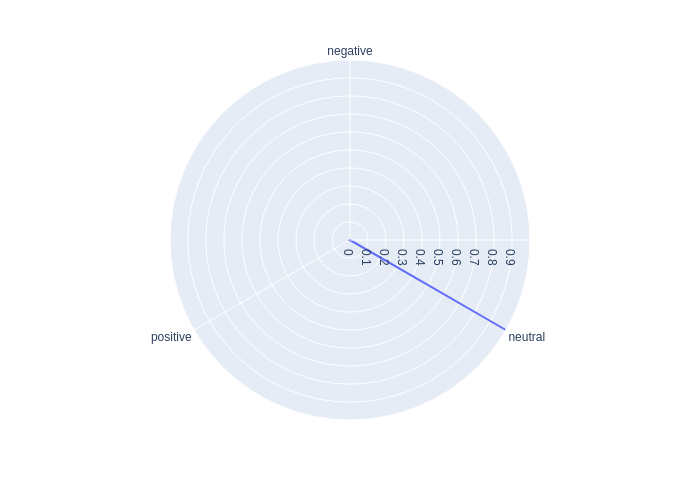

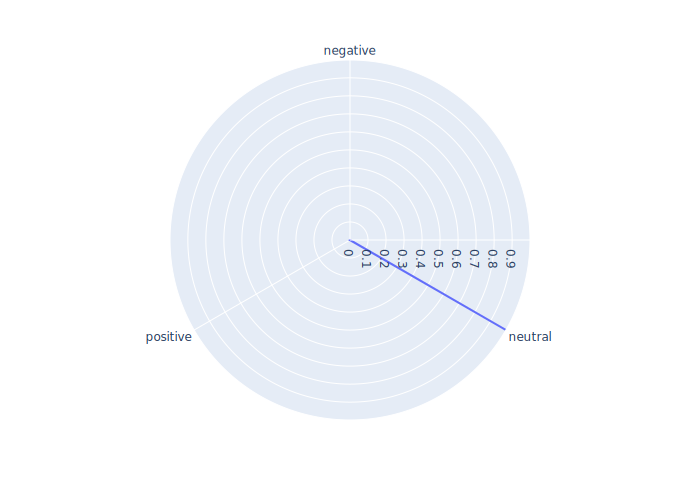

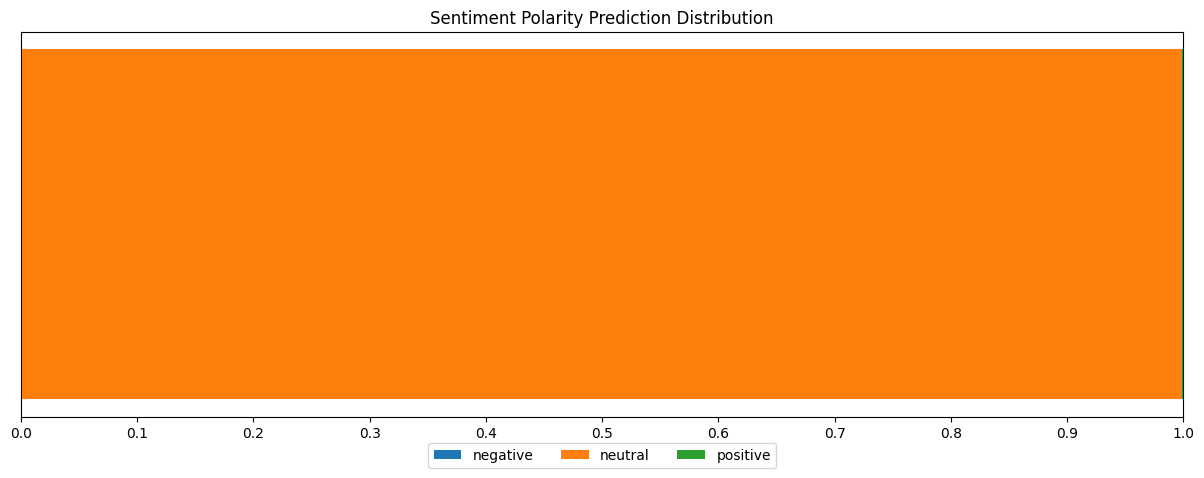

In [73]:
sample_text = "plz send the doc asap i need it by toni8"
predictions = predict(sample_text, best_model, tokenizer, device, max_len=128)
print(f"Predicted sentiment polarities for '{sample_text}': {predictions}")


predictions_array = predictions.squeeze()
binary_predictions = np.zeros_like(predictions_array)
max_indices = np.argmax(predictions_array)
binary_predictions[max_indices] = 1

print(f"NEAGTIVE: {binary_predictions[0]}, NEUTRAL: {binary_predictions[1]}, POSITIVE: {binary_predictions[2]}")

# labels = ['Negative', 'Neutral', 'Positive']



sentiment_polarities = []
for items in predictions_array:
    sentiment_polarities.append(items)

fig = px.line_polar(pd.DataFrame(dict(r=sentiment_polarities, theta=SENTIMENT_POLARITY_LABELS)), r='r', theta='theta', line_close=True)
# fig.show()

fig.show(renderer="png")  # Renders as PNG
fig.show(renderer="svg")  # Renders as SVG

# fig.write_image("/kaggle/working/sp_test1.png")

# Display the image (this will work for static rendering in platforms like Kaggle)

# Image("/kaggle/working/sp_test1.png")
# display(fig)


normalized_predictions = predictions_array / predictions_array.sum()

fig, ax = plt.subplots(figsize=(15, 5))

left = 0
for i in range(len(normalized_predictions)):
    ax.barh(0, normalized_predictions[i], color=plt.cm.tab10(i), left=left, label=SENTIMENT_POLARITY_LABELS[i])
    left += normalized_predictions[i]

# Add legend
ax.set_xlim(0, 1)
ax.set_yticks([])
ax.set_xticks(np.arange(0, 1.1, 0.1))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=len(SENTIMENT_POLARITY_LABELS))

# Add title
plt.title('Sentiment Polarity Prediction Distribution')

plt.show()

Predicted sentiment polarities for 'hey! hru, wanna ply valo toni8?': [[2.4625091e-04 9.9893612e-01 1.0578855e-03]]
NEAGTIVE: 0.0, NEUTRAL: 1.0, POSITIVE: 0.0


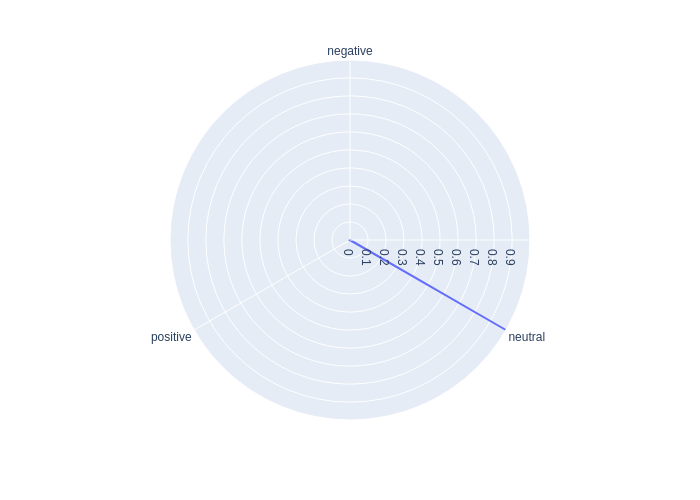

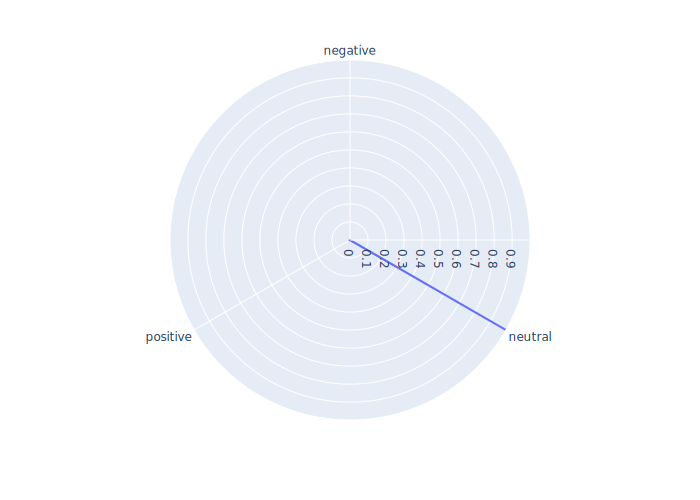

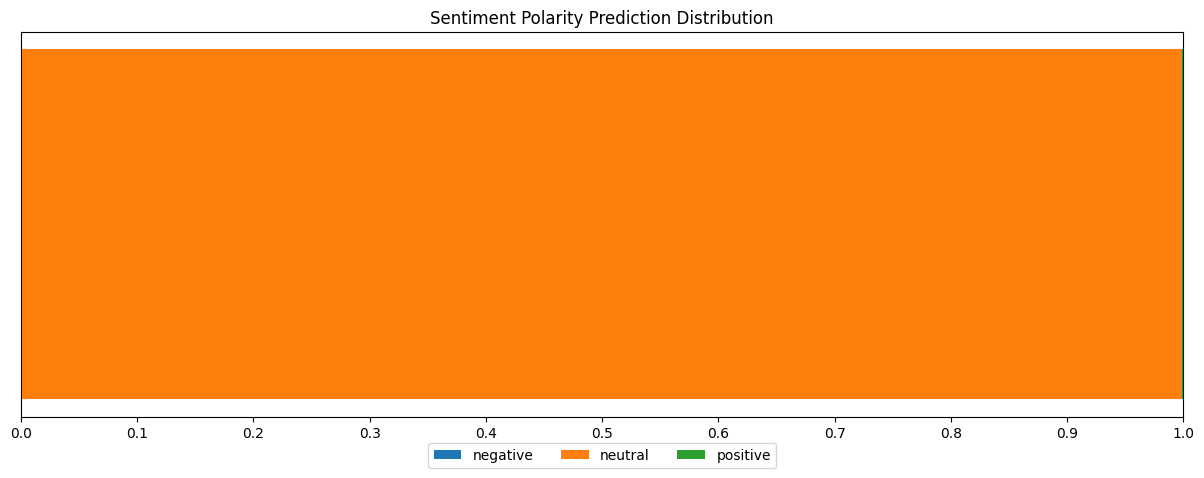

In [74]:
sample_text = "hey! hru, wanna ply valo toni8?"
predictions = predict(sample_text, best_model, tokenizer, device, max_len=128)
print(f"Predicted sentiment polarities for '{sample_text}': {predictions}")


predictions_array = predictions.squeeze()
binary_predictions = np.zeros_like(predictions_array)
max_indices = np.argmax(predictions_array)
binary_predictions[max_indices] = 1

print(f"NEAGTIVE: {binary_predictions[0]}, NEUTRAL: {binary_predictions[1]}, POSITIVE: {binary_predictions[2]}")

# labels = ['Negative', 'Neutral', 'Positive']



sentiment_polarities = []
for items in predictions_array:
    sentiment_polarities.append(items)

fig = px.line_polar(pd.DataFrame(dict(r=sentiment_polarities, theta=SENTIMENT_POLARITY_LABELS)), r='r', theta='theta', line_close=True)
# fig.show()

fig.show(renderer="png")  # Renders as PNG
fig.show(renderer="svg")  # Renders as SVG

# fig.write_image("/kaggle/working/sp_test2.png")

# Display the image (this will work for static rendering in platforms like Kaggle)

# Image("/kaggle/working/sp_test2.png")
# display(fig)


normalized_predictions = predictions_array / predictions_array.sum()

fig, ax = plt.subplots(figsize=(15, 5))

left = 0
for i in range(len(normalized_predictions)):
    ax.barh(0, normalized_predictions[i], color=plt.cm.tab10(i), left=left, label=SENTIMENT_POLARITY_LABELS[i])
    left += normalized_predictions[i]

# Add legend
ax.set_xlim(0, 1)
ax.set_yticks([])
ax.set_xticks(np.arange(0, 1.1, 0.1))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=len(SENTIMENT_POLARITY_LABELS))

# Add title
plt.title('Sentiment Polarity Prediction Distribution')

plt.show()

Predicted sentiment polarities for 'what a badass char is arthur, he is the best game char ever made, i luv rdr2': [[3.0173361e-04 4.7456758e-04 9.9936289e-01]]
NEAGTIVE: 0.0, NEUTRAL: 0.0, POSITIVE: 1.0


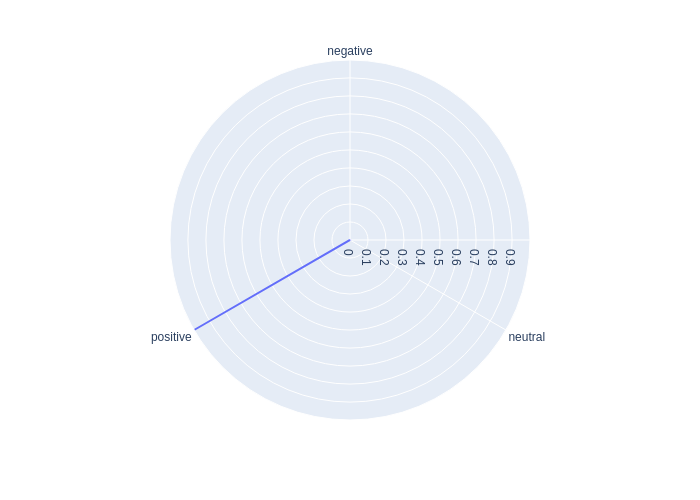

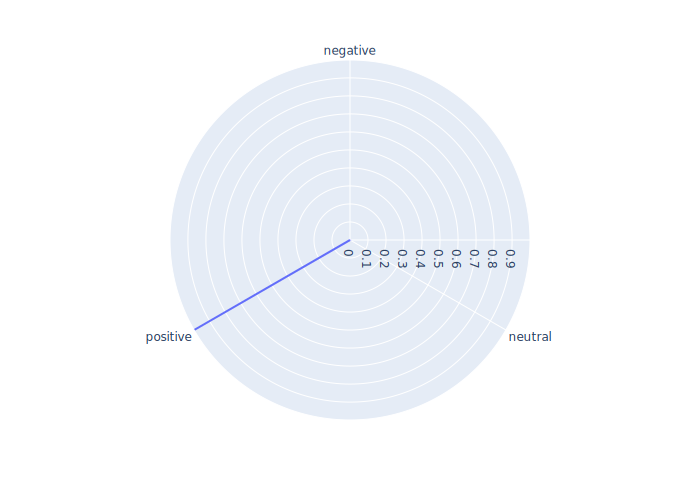

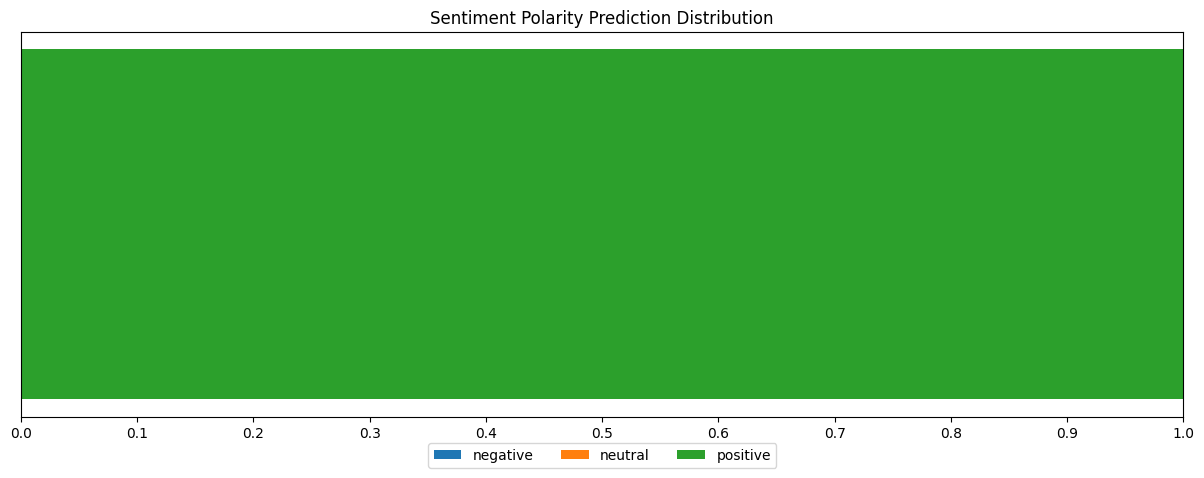

In [75]:
sample_text = "what a badass char is arthur, he is the best game char ever made, i luv rdr2"
predictions = predict(sample_text, best_model, tokenizer, device, max_len=128)
print(f"Predicted sentiment polarities for '{sample_text}': {predictions}")


predictions_array = predictions.squeeze()
binary_predictions = np.zeros_like(predictions_array)
max_indices = np.argmax(predictions_array)
binary_predictions[max_indices] = 1

print(f"NEAGTIVE: {binary_predictions[0]}, NEUTRAL: {binary_predictions[1]}, POSITIVE: {binary_predictions[2]}")

# labels = ['Negative', 'Neutral', 'Positive']



sentiment_polarities = []
for items in predictions_array:
    sentiment_polarities.append(items)

fig = px.line_polar(pd.DataFrame(dict(r=sentiment_polarities, theta=SENTIMENT_POLARITY_LABELS)), r='r', theta='theta', line_close=True)
# fig.show()

fig.show(renderer="png")  # Renders as PNG
fig.show(renderer="svg")  # Renders as SVG

# fig.write_image("/kaggle/working/sp_test3.png")

# Display the image (this will work for static rendering in platforms like Kaggle)

# Image("/kaggle/working/sp_test3.png")
# display(fig)


normalized_predictions = predictions_array / predictions_array.sum()

fig, ax = plt.subplots(figsize=(15, 5))

left = 0
for i in range(len(normalized_predictions)):
    ax.barh(0, normalized_predictions[i], color=plt.cm.tab10(i), left=left, label=SENTIMENT_POLARITY_LABELS[i])
    left += normalized_predictions[i]

# Add legend
ax.set_xlim(0, 1)
ax.set_yticks([])
ax.set_xticks(np.arange(0, 1.1, 0.1))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=len(SENTIMENT_POLARITY_LABELS))

# Add title
plt.title('Sentiment Polarity Prediction Distribution')

plt.show()


Predicted sentiment polarities for 'I don't no fr y hes sooo sad.': [[9.998872e-01 9.283583e-05 4.410836e-05]]
NEAGTIVE: 1.0, NEUTRAL: 0.0, POSITIVE: 0.0


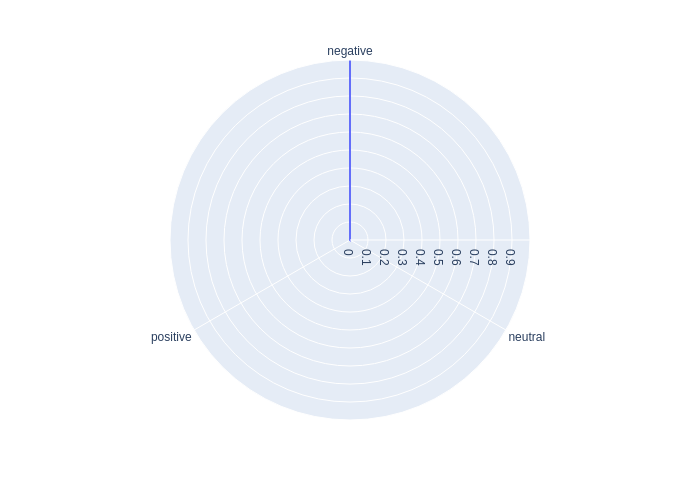

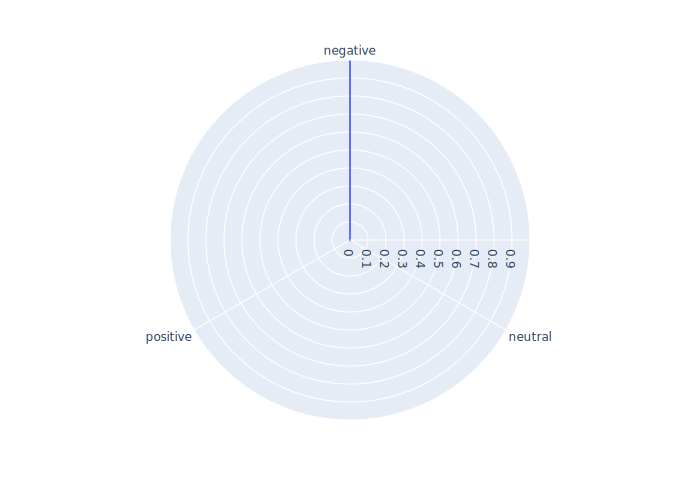

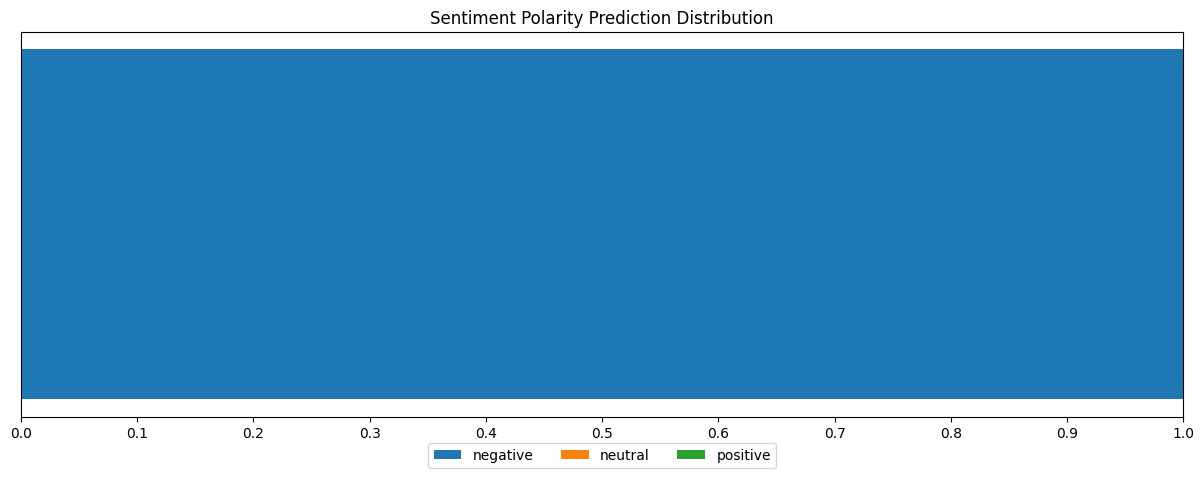

In [76]:
sample_text = "I don't no fr y hes sooo sad."
predictions = predict(sample_text, best_model, tokenizer, device, max_len=128)
print(f"Predicted sentiment polarities for '{sample_text}': {predictions}")


predictions_array = predictions.squeeze()
binary_predictions = np.zeros_like(predictions_array)
max_indices = np.argmax(predictions_array)
binary_predictions[max_indices] = 1

print(f"NEAGTIVE: {binary_predictions[0]}, NEUTRAL: {binary_predictions[1]}, POSITIVE: {binary_predictions[2]}")

# labels = ['Negative', 'Neutral', 'Positive']



sentiment_polarities = []
for items in predictions_array:
    sentiment_polarities.append(items)

fig = px.line_polar(pd.DataFrame(dict(r=sentiment_polarities, theta=SENTIMENT_POLARITY_LABELS)), r='r', theta='theta', line_close=True)
# fig.show()

fig.show(renderer="png")  # Renders as PNG
fig.show(renderer="svg")  # Renders as SVG

# fig.write_image("/kaggle/working/sp_test4.png")

# Display the image (this will work for static rendering in platforms like Kaggle)

# Image("/kaggle/working/sp_test4.png")
# display(fig)


normalized_predictions = predictions_array / predictions_array.sum()

fig, ax = plt.subplots(figsize=(15, 5))

left = 0
for i in range(len(normalized_predictions)):
    ax.barh(0, normalized_predictions[i], color=plt.cm.tab10(i), left=left, label=SENTIMENT_POLARITY_LABELS[i])
    left += normalized_predictions[i]

# Add legend
ax.set_xlim(0, 1)
ax.set_yticks([])
ax.set_xticks(np.arange(0, 1.1, 0.1))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=len(SENTIMENT_POLARITY_LABELS))

# Add title
plt.title('Sentiment Polarity Prediction Distribution')

plt.show()